# Push SWAG/Multi-SWAG

Stochastic weight averaging gaussian (SWAG), introduced here in [this paper](https://arxiv.org/pdf/1902.02476.pdf) produces a distribution over the weights of a neural network. Multiple SWAG initializations can be run independently, and their predictions can be averaged together in a manner similar to Deep Ensembles to produce a new method called [Multi-SWAG](https://arxiv.org/pdf/2002.08791.pdf).

### Dataset

We setup the dataset with $N$ points of dimension $D$ in the next cell.

In [2]:
from bdl import RandDataset

D = 1
batch_size = 128
N = 1
dataset = RandDataset(batch_size, N, D)
dataset

```py
class RandDataset(Dataset):
    def __init__(self, batch_size, N, D):
        self.xs = torch.randn(batch_size*N, D)
        self.ys = torch.randn(batch_size*N, 1)

    def __len__(self):
        return len(self.xs)

    def __getitem__(self, idx):
        return self.xs[idx], self.ys[idx]
```

## Plotting the Dataset 

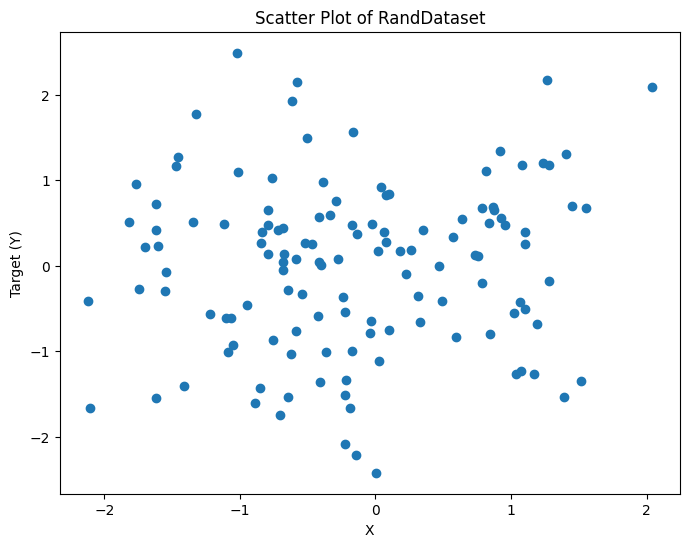

In [5]:
import matplotlib.pyplot as plt


# Extract the data
xs = dataset.xs
ys = dataset.ys

# Plot the data without a colorbar
plt.figure(figsize=(8, 6))
plt.scatter(xs, ys)
plt.title('Scatter Plot of RandDataset')
plt.xlabel('X')
plt.ylabel('Target (Y)')
plt.show()


### Neural Network

We create a simple neural network (NN). This NN contains two fully-connected layers of dimension $D$ and uses a ReLU activation function. 

In [2]:
from bdl import MiniNN

```py
class MiniNN(nn.Module):
    def __init__(self, D):
        super(MiniNN, self).__init__()
        self.fc1 = nn.Linear(D, D)
        self.fc2 = nn.Linear(D, D)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.nn.ReLU()(x)
        x = self.fc2(x)
        return x
```

# Particles
The number of particles determines the number of independent SWAG runs we will ensemble. Choosing particle number of 1 will result in a normal SWAG run, while any number of particles greater than 1 will result in a Multi-SWAG run. 

# Running SWAG with Push

In [3]:
import torch
from torch.utils.data import DataLoader
import push.bayes.swag

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
pretrain_epochs = 10
swag_epochs = 10
particles = 10
cache_size = 3
view_size = 2

push.bayes.swag.train_mswag(
            dataloader,
            torch.nn.MSELoss(),
            pretrain_epochs,
            swag_epochs,
            particles,
            cache_size,
            view_size, 
            MiniNN, D
        )

  0%|          | 0/10 [00:00<?, ?it/s]

Average epoch loss tensor(0.8861)
Average epoch loss tensor(0.8861)
Average epoch loss tensor(0.8861)
Average epoch loss tensor(0.8861)
Average epoch loss tensor(0.8861)


 40%|████      | 4/10 [00:00<00:00,  8.25it/s]

Average epoch loss tensor(0.8861)
Average epoch loss tensor(0.8861)
Average epoch loss tensor(0.8861)
Average epoch loss tensor(0.8861)
Average epoch loss tensor(0.8861)


  0%|          | 0/10 [00:00<?, ?it/s]

Average epoch loss tensor(0.8861)
Average epoch loss tensor(0.8861)
Average epoch loss tensor(0.8861)
Average epoch loss tensor(0.8861)


 40%|████      | 4/10 [00:00<00:00, 16.00it/s]

Average epoch loss tensor(0.8860)
Average epoch loss tensor(0.8860)
Average epoch loss tensor(0.8860)
Average epoch loss tensor(0.8860)


 80%|████████  | 8/10 [00:00<00:00, 16.00it/s]

Average epoch loss tensor(0.8860)
Average epoch loss tensor(0.8860)


100%|██████████| 10/10 [00:00<00:00, 15.93it/s]
